In [7]:
import pandas as pd

ipl_data = {
    'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
    'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
    'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    'Points':[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]
}

df = pd.DataFrame(ipl_data)

In [8]:
df.head()

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741


In [13]:
# 한개 이상의 column Groupby 가능 (인덱스도 컬럼 갯수와 동일하게 생성됨) => 팀별 / 연도별 점수 합산
df_groupby = df.groupby(['Team', 'Year'])['Points'].sum()

In [15]:
df_groupby.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [16]:
# filter => 특정 조건에 대한 결과 추출
df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [28]:
# 이 상태는 groupby 만 된 상태 => 여기서 집계함수 같이 선언해줘야 최종적인 groupby 된 결과 확인 가능
df.groupby('Team').filter(lambda x: x['Points'].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


In [29]:
# Team 이름이 Riders 인 경우 => Year 기준으로 그룹핑 => 점수 합계
df[df['Team'] == 'Riders'].groupby('Year')['Points'].sum()

Year
2014    876
2015    789
2016    694
2017    690
Name: Points, dtype: int64

In [33]:
# groupby with aggregation => groupby 한 컬럼은 인덱스가 됨 + agg 에 추가한 컬럼이 컬럼 기준이 됨 (다수의 집계항목 추출 가능)
df.groupby('Team').agg({
    'Points': [sum, 'count']
})

Points      
          sum count
Team               
Devils   1536     2
Kings    2285     3
Riders   3049     4
Royals   1505     2
kings     812     1

In [39]:
wage_url = 'wages.csv'
data = pd.read_csv(wage_url, encoding='utf-8-sig', delimiter=',', error_bad_lines=False)
data.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [38]:
data.tail()

,earn,height,sex,race,ed,age
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54
1378,9575.461857,68.22,male,white,12,31


In [40]:
data.isnull().sum()

earn      0
height    0
sex       0
race      0
ed        0
age       0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1379 non-null   float64
 1   height  1379 non-null   float64
 2   sex     1379 non-null   object 
 3   race    1379 non-null   object 
 4   ed      1379 non-null   int64  
 5   age     1379 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 64.8+ KB


In [42]:
data.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


In [45]:
# male / female
print(data['sex'].value_counts())

# 4-races
print(data['race'].value_counts())

female    859
male      520
Name: sex, dtype: int64
white       1147
black        126
hispanic      77
other         29
Name: race, dtype: int64


<AxesSubplot:>

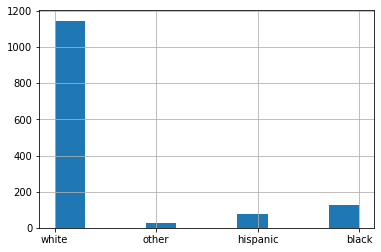

In [46]:
data['race'].hist()

<AxesSubplot:>

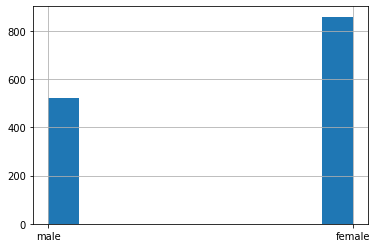

In [47]:
data['sex'].hist()

In [48]:
# argmax => 해당 행 혹은 열에서 가장 큰 값의 인덱스 (위치)
data['earn'].argmax()

1252

In [51]:
df_a = pd.DataFrame({
    'name': ['jyp', 'jgp'],
    'earn': [1000, 20000]
})

df_b = pd.DataFrame({
    'name': ['jyp', 'jgp'],
    'points': [50000, 300000]
})

# 쿼리 join 과 같은 역할
pd.merge(df_a, df_b, on='name')

,name,earn,points
0,jyp,1000,50000
1,jgp,20000,300000


In [ ]:
# sqlite3 로 db connection 하여 쿼리 실행하여 원하는 데이터 조회 가능